In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [3]:
traindata = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/asl202020202030.appspot.com/o/sign_mnist_train.csv?alt=media&token=f27b368a-64cc-4081-849d-927f08f60e07')


In [4]:
traindata.shape

(27455, 785)

In [5]:
trainlabel = traindata['label'].values
trainlabel

array([ 3,  6,  2, ..., 18, 17, 23])

In [6]:
traindata.drop('label',inplace=True,axis=1)
trainimages=traindata.values
trainimages

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [7]:
trainimages.shape

(27455, 784)

In [8]:
trainimages=trainimages.reshape(-1,28,28,1)

In [9]:
trainimages.shape

(27455, 28, 28, 1)

In [28]:
testdata = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/asl202020202030.appspot.com/o/sign_mnist_test.csv?alt=media&token=300f40d5-d39e-4df3-b43f-87ba5cc4d21c')

In [29]:
testlabel=testdata['label'].values  

In [57]:
testlabel[20:60]

array([ 2,  0, 21,  4, 10, 15,  2, 15,  7,  1,  7,  8, 13, 19,  3, 21, 13,
        3, 18, 14, 15, 23,  8, 15, 14,  5, 17,  4, 19, 13, 20, 22, 20,  5,
       16, 16, 21,  4,  7, 22])

In [30]:
testdata.drop('label',inplace=True,axis=1)
testimages=testdata.values

In [31]:
testimages=testimages.reshape(-1,28,28,1)

In [60]:
testimages

array([[[[149],
         [149],
         [150],
         ...,
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         ...,
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151],
         ...,
         [151],
         [151],
         [152]],

        ...,

        [[ 69],
         [ 69],
         [ 77],
         ...,
         [116],
         [113],
         [118]],

        [[ 74],
         [ 75],
         [ 76],
         ...,
         [110],
         [116],
         [113]],

        [[ 75],
         [ 74],
         [ 74],
         ...,
         [112],
         [120],
         [107]]],


       [[[126],
         [128],
         [131],
         ...,
         [133],
         [134],
         [132]],

        [[129],
         [132],
         [134],
         ...,
         [136],
         [136],
         [134]],

        [[133],
         [135],
         [138],
         ...,
         [140],
         [

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [34]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [35]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [36]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))

In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [39]:
from keras.callbacks import *
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [40]:
history=model.fit(traindata_generator,epochs=10,validation_data=validationdata_generator,callbacks=[callback,annealer])

Epoch 1/10
773/773 [==============================] - 32s 27ms/step - loss: 0.8545 - accuracy: 0.7352 - val_loss: 0.4827 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 2/10
773/773 [==============================] - 21s 27ms/step - loss: 0.2023 - accuracy: 0.9360 - val_loss: 0.2230 - val_accuracy: 0.9286 - lr: 9.5000e-04
Epoch 3/10
773/773 [==============================] - 21s 27ms/step - loss: 0.1020 - accuracy: 0.9687 - val_loss: 1.8018 - val_accuracy: 0.5811 - lr: 9.0250e-04
Epoch 4/10
773/773 [==============================] - 21s 27ms/step - loss: 0.0794 - accuracy: 0.9752 - val_loss: 0.5991 - val_accuracy: 0.8124 - lr: 8.5737e-04
Epoch 5/10
773/773 [==============================] - 20s 26ms/step - loss: 0.0711 - accuracy: 0.9775 - val_loss: 2.5711 - val_accuracy: 0.5574 - lr: 8.1451e-04
Epoch 6/10
773/773 [==============================] - 20s 26ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0296 - val_accuracy: 0.9916 - lr: 7.7378e-04
Epoch 7/10
773/773 [==================

In [43]:
model.evaluate_generator(testdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


1.0

In [20]:
model.save_weights("aslconv4.h5")

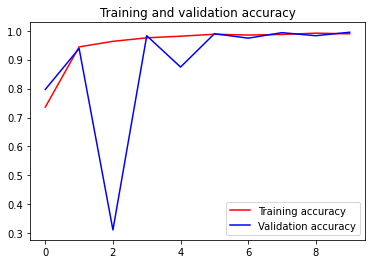

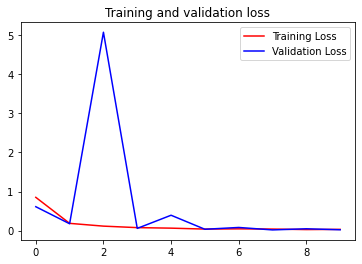

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model1 = Sequential([Conv2D(32,(3,3),activation="relu",input_shape=(28, 28, 1))])
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(25,activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(traindata_generator,epochs=10,validation_data=validationdata_generator,callbacks=[callback,annealer])

773/773 [==============================] - 46s 21ms/step - loss: 2.4338 - accuracy: 0.2442 - val_loss: 1.7124 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 2/10
773/773 [==============================] - 16s 20ms/step - loss: 1.4126 - accuracy: 0.5317 - val_loss: 1.2405 - val_accuracy: 0.5956 - lr: 9.5000e-04
Epoch 3/10
773/773 [==============================] - 16s 20ms/step - loss: 1.0388 - accuracy: 0.6492 - val_loss: 0.9499 - val_accuracy: 0.6729 - lr: 9.0250e-04
Epoch 4/10
773/773 [==============================] - 16s 21ms/step - loss: 0.8364 - accuracy: 0.7102 - val_loss: 0.7642 - val_accuracy: 0.7410 - lr: 8.5737e-04
Epoch 5/10
773/773 [==============================] - 16s 21ms/step - loss: 0.6970 - accuracy: 0.7621 - val_loss: 0.6283 - val_accuracy: 0.7942 - lr: 8.1451e-04
Epoch 6/10
773/773 [==============================] - 16s 21ms/step - loss: 0.5866 - accuracy: 0.7999 - val_loss: 0.5045 - val_accuracy: 0.8182 - lr: 7.7378e-04
Epoch 7/10
773/773 [=============================

In [ ]:
model1.evaluate_generator(testdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.9202454090118408

In [ ]:
model1.save_weights("aslconv4.h5")

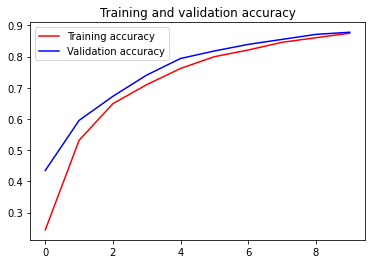

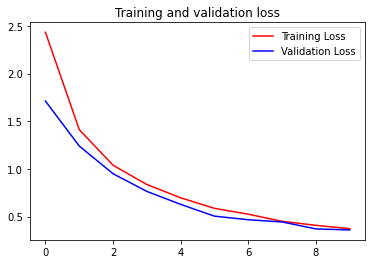

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model2 = Sequential([Conv2D(32,(3,3),activation="sigmoid",input_shape=(28, 28, 1))])
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='sigmoid'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='sigmoid'))
model2.add(Flatten())
model2.add(Dense(64, activation='sigmoid'))
model2.add(Dense(25,activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [ ]:
history2 = model2.fit(traindata_generator,epochs=50,validation_data=validationdata_generator)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


773/773 [==============================] - 17s 21ms/step - loss: 3.1868 - accuracy: 0.0409 - val_loss: 3.1791 - val_accuracy: 0.0444
Epoch 2/50
773/773 [==============================] - 16s 20ms/step - loss: 3.1787 - accuracy: 0.0440 - val_loss: 3.1824 - val_accuracy: 0.0397
Epoch 3/50
773/773 [==============================] - 16s 20ms/step - loss: 3.1790 - accuracy: 0.0455 - val_loss: 3.1775 - val_accuracy: 0.0481
Epoch 4/50
773/773 [==============================] - 16s 20ms/step - loss: 3.1451 - accuracy: 0.0526 - val_loss: 2.8300 - val_accuracy: 0.1494
Epoch 5/50
773/773 [==============================] - 16s 20ms/step - loss: 2.4198 - accuracy: 0.2457 - val_loss: 2.1848 - val_accuracy: 0.3064
Epoch 6/50
773/773 [==============================] - 16s 20ms/step - loss: 2.1014 - accuracy: 0.3393 - val_loss: 2.0241 - val_accuracy: 0.3617
Epoch 7/50
773/773 [==============================] - 16s 21ms/step - loss: 1.9193 - accuracy: 0.3953 - val_loss: 1.8497 - val_accuracy: 0.4117
Epo

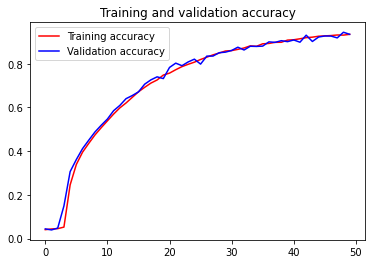

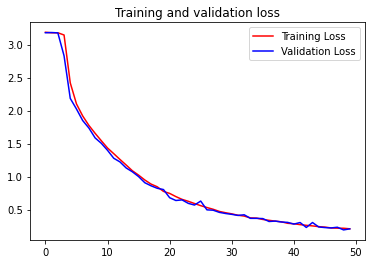

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model2.evaluate_generator(testdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.9663971066474915

In [ ]:
model3 = Sequential([Conv2D(32,(3,3),activation="tanh",input_shape=(28, 28, 1))])
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='tanh'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='tanh'))
model3.add(Flatten())
model3.add(Dense(64, activation='tanh'))
model3.add(Dense(26,activation="softmax"))

In [ ]:
model3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(traindata_generator,epochs=10,validation_data=validationdata_generator)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


773/773 [==============================] - 17s 21ms/step - loss: 1.9306 - accuracy: 0.4107 - val_loss: 1.1588 - val_accuracy: 0.6470
Epoch 2/10
773/773 [==============================] - 16s 21ms/step - loss: 0.9287 - accuracy: 0.7106 - val_loss: 0.7903 - val_accuracy: 0.7490
Epoch 3/10
773/773 [==============================] - 16s 21ms/step - loss: 0.6209 - accuracy: 0.8109 - val_loss: 0.5262 - val_accuracy: 0.8383
Epoch 4/10
773/773 [==============================] - 16s 21ms/step - loss: 0.4701 - accuracy: 0.8590 - val_loss: 0.3883 - val_accuracy: 0.8834
Epoch 5/10
773/773 [==============================] - 16s 21ms/step - loss: 0.3789 - accuracy: 0.8862 - val_loss: 0.3151 - val_accuracy: 0.9013
Epoch 6/10
773/773 [==============================] - 16s 21ms/step - loss: 0.3114 - accuracy: 0.9048 - val_loss: 0.2680 - val_accuracy: 0.9191
Epoch 7/10
773/773 [==============================] - 16s 21ms/step - loss: 0.2692 - accuracy: 0.9167 - val_loss: 0.2265 - val_accuracy: 0.9297
Epo

In [ ]:
model3.evaluate_generator(testdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.9746235609054565

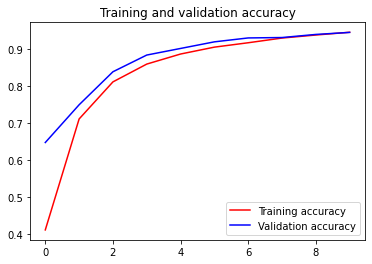

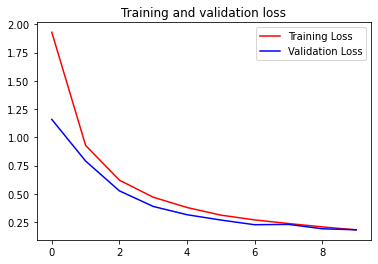

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Dense

In [ ]:
leaky_relu = LeakyReLU(alpha=0.01)

In [ ]:
model4 = Sequential([Conv2D(32,(3,3),activation=leaky_relu,input_shape=(28, 28, 1))])
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation=leaky_relu))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation=leaky_relu))
model4.add(Flatten())
model4.add(Dense(64, activation=leaky_relu))
model4.add(Dense(26,activation="softmax"))

In [ ]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)              

In [ ]:
model4.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(traindata_generator,epochs=10,validation_data=validationdata_generator)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


773/773 [==============================] - 17s 21ms/step - loss: 2.1883 - accuracy: 0.3100 - val_loss: 1.2927 - val_accuracy: 0.5592
Epoch 2/10
773/773 [==============================] - 16s 21ms/step - loss: 1.0311 - accuracy: 0.6515 - val_loss: 0.7869 - val_accuracy: 0.7366
Epoch 3/10
773/773 [==============================] - 16s 21ms/step - loss: 0.6501 - accuracy: 0.7776 - val_loss: 0.5573 - val_accuracy: 0.8131
Epoch 4/10
773/773 [==============================] - 16s 21ms/step - loss: 0.4617 - accuracy: 0.8441 - val_loss: 0.4222 - val_accuracy: 0.8590
Epoch 5/10
773/773 [==============================] - 16s 21ms/step - loss: 0.3484 - accuracy: 0.8834 - val_loss: 0.3235 - val_accuracy: 0.8973
Epoch 6/10
773/773 [==============================] - 16s 21ms/step - loss: 0.2682 - accuracy: 0.9097 - val_loss: 0.2315 - val_accuracy: 0.9246
Epoch 7/10
773/773 [==============================] - 16s 21ms/step - loss: 0.2230 - accuracy: 0.9250 - val_loss: 0.2163 - val_accuracy: 0.9268
Epo

In [ ]:
model4.evaluate_generator(testdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.9822922348976135

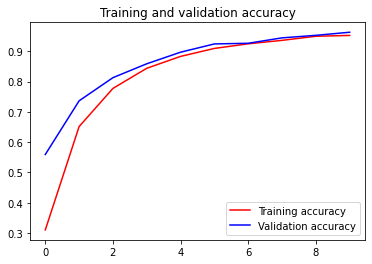

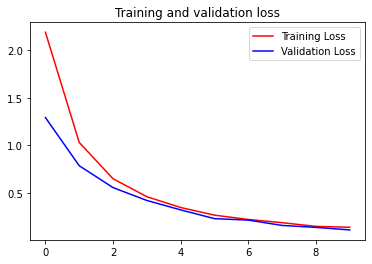

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Cross validation

In [10]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
url = "http://grafins.com/ml/compressed_data.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('.')

In [81]:
labels = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8, "J":9, "K":10, "L":11, "M":12, "N":13, "O":14, "P":15, "Q":16, "R":17, "S":18, "T":19, "U":20, "V":21, "W":22, "X":23, "Y":24, "Z":25}
data_dir = './compressed_data/train/'
img_size = 28
def get_data():
  data = []
  x_data = []
  y_data = []
  for label in labels:
    if label=='J' or label=='Z':
      continue
    path = os.path.join(data_dir,label)
    print("Extracting",label)
    for img in os.listdir(path):
      try:
        image = cv2.imread(os.path.join(path,img),1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image,(img_size,img_size))
        data.append([image,labels[label]])
      except Exception as e:
        print(e)
  random.shuffle(data)
  for d in data:
    x_data.append(d[0])
    y_data.append(d[1])
  print(len(x_data),len(y_data))
  return np.array(x_data),np.array(y_data),len(x_data)

In [75]:
import os
import cv2

In [99]:
x, y, size = get_data()

Extracting A
Extracting B
Extracting C
Extracting D
Extracting E
Extracting F
Extracting G
Extracting H
Extracting I
Extracting K
Extracting L
Extracting M
Extracting N
Extracting O
Extracting P
Extracting Q
Extracting R
Extracting S
Extracting T
Extracting U
Extracting V
Extracting W
Extracting X
Extracting Y
72000 72000


In [111]:
x

array([[[ 10,   7,   8, ...,  17,  19,  67],
        [ 26,  29,  20, ...,  28,  56,  53],
        [ 16,  15,  13, ...,  52,  56,  53],
        ...,
        [136, 141, 144, ...,  61,  49,  39],
        [143, 144, 147, ..., 210, 220, 104],
        [143, 145, 147, ..., 217, 221, 228]],

       [[106, 105, 104, ...,  40,  38,  55],
        [183, 180, 179, ...,  72,  66,  60],
        [189, 187, 187, ..., 132, 121, 110],
        ...,
        [ 87,  98,  92, ..., 115, 114, 116],
        [150,  60,  49, ..., 117, 114, 114],
        [ 26,  17,  15, ..., 114, 115, 116]],

       [[127, 121, 114, ..., 130, 113, 143],
        [105, 113, 130, ..., 102, 116, 127],
        [252, 252, 252, ...,  77,  81,  80],
        ...,
        [ 91,  93,  95, ..., 133, 137, 136],
        [ 92,  96,  99, ..., 138, 142, 141],
        [ 90,  96, 100, ..., 146, 147, 146]],

       ...,

       [[  9,   9,   9, ...,  16,  18,  56],
        [ 23,  35,  24, ...,  30,  51,  50],
        [ 14,  15,  14, ...,  48,  50,  54

In [101]:

x.shape

(72000, 28, 28)

In [108]:
import math
import random
split = math.ceil(size*0.9)
x_train2 = x[:split]
y_train2 = y[:split]
x_test2 = x[split:]
y_test2 = y[split:]


In [120]:

x_test2


array([[[[ 13],
         [  9],
         [ 10],
         ...,
         [ 19],
         [ 25],
         [ 70]],

        [[ 27],
         [ 46],
         [ 36],
         ...,
         [ 41],
         [ 56],
         [ 61]],

        [[ 20],
         [ 18],
         [ 20],
         ...,
         [ 57],
         [ 62],
         [ 64]],

        ...,

        [[133],
         [125],
         [ 94],
         ...,
         [229],
         [233],
         [238]],

        [[132],
         [123],
         [ 96],
         ...,
         [230],
         [238],
         [239]],

        [[138],
         [121],
         [ 99],
         ...,
         [231],
         [235],
         [242]]],


       [[[ 85],
         [ 78],
         [ 86],
         ...,
         [ 61],
         [ 67],
         [125]],

        [[ 81],
         [ 75],
         [ 56],
         ...,
         [ 76],
         [128],
         [135]],

        [[ 78],
         [ 72],
         [ 76],
         ...,
         [131],
         [

In [133]:
crosstestgen=ImageDataGenerator(rescale=1/255.0)
crosstestdata_generator = crosstestgen.flow(x_test2,y_test2)


In [134]:
model.evaluate_generator(crosstestdata_generator)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


0.08930555731058121